# import libraries

In [1]:
# basic libraries

import numpy as np
import pandas as pd
from sklearn.covariance import EmpiricalCovariance, MinCovDet
import sklearn.covariance
from scipy.spatial import distance
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import math
# plotting stuff
import matplotlib.pyplot as plt
import matplotlib as mpl
import collections
import seaborn as sb
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 6

import warnings

# Define directories

In [2]:
in_dir = "/Users/hn/Desktop/Desktop/Kirti/check_point/analogs/"
out_dir = "/Users/hn/Desktop/"

# Read data

In [3]:
all_data_usa = pd.read_csv(in_dir + "all_data_usa.csv")
all_data_usa.head(2)

,year,location,medianDoY,NumLarvaGens_Aug,mean_escaped_Gen1,mean_escaped_Gen2,mean_escaped_Gen3,mean_escaped_Gen4,mean_precip,mean_gdd,treatment,ClimateScenario
0,1979,32.46875_-109.90625,68,2.939262,1.319697,7.080458,1.348167,0.0,300.525,4821.668922,0,observed
1,1979,32.46875_-109.96875,68,2.946050,1.245847,7.104994,1.396980,0.0,303.925,4831.770062,0,observed


# Take numerical part of data
i.e. drop the string columns indication years, locations, etc.

In [4]:
print(list(all_data_usa)) # print makes it horizontal

['year', 'location', 'medianDoY', 'NumLarvaGens_Aug', 'mean_escaped_Gen1', 'mean_escaped_Gen2', 'mean_escaped_Gen3', 'mean_escaped_Gen4', 'mean_precip', 'mean_gdd', 'treatment', 'ClimateScenario']


In [5]:
numeric_feat = ['medianDoY', 'NumLarvaGens_Aug', 'mean_escaped_Gen1', 'mean_escaped_Gen2',
                'mean_escaped_Gen3', 'mean_escaped_Gen4', 'mean_precip', 'mean_gdd']
all_usa_numeric = all_data_usa.loc[:, numeric_feat].copy()

In [6]:
all_usa_numeric.head(2)

,medianDoY,NumLarvaGens_Aug,mean_escaped_Gen1,mean_escaped_Gen2,mean_escaped_Gen3,mean_escaped_Gen4,mean_precip,mean_gdd
0,68,2.939262,1.319697,7.080458,1.348167,0.0,300.525,4821.668922
1,68,2.946050,1.245847,7.104994,1.396980,0.0,303.925,4831.770062


In [7]:
# compute correlation matrix
corr_Mat = all_usa_numeric.corr()

plt.matshow(corr_Mat)
plt.show()

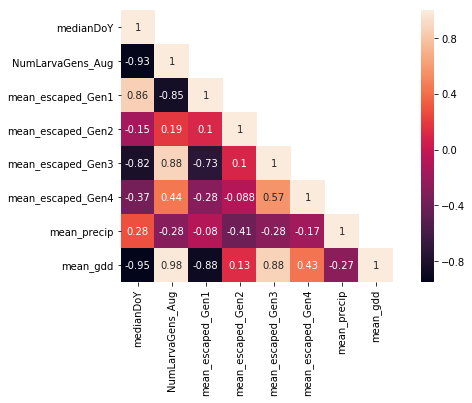

In [8]:
mask = np.array(corr_Mat)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,5)

# the following line can be added to the plot command
# .set_xticklabels(ax.get_xticklabels(), rotation=70) # , vmax=.8
sb.heatmap(corr_Mat, mask=mask, annot=True, square=True); 

In [9]:
corr_Mat

,medianDoY,NumLarvaGens_Aug,mean_escaped_Gen1,mean_escaped_Gen2,mean_escaped_Gen3,mean_escaped_Gen4,mean_precip,mean_gdd
medianDoY,1.000000,-0.930232,0.857038,-0.152723,-0.817308,-0.369176,0.284099,-0.950182
NumLarvaGens_Aug,-0.930232,1.000000,-0.850017,0.192258,0.878302,0.444866,-0.284415,0.983979
mean_escaped_Gen1,0.857038,-0.850017,1.000000,0.103807,-0.734399,-0.284559,-0.080484,-0.882840
mean_escaped_Gen2,-0.152723,0.192258,0.103807,1.000000,0.100283,-0.088287,-0.408131,0.131926
mean_escaped_Gen3,-0.817308,0.878302,-0.734399,0.100283,1.000000,0.572224,-0.276170,0.875230
mean_escaped_Gen4,-0.369176,0.444866,-0.284559,-0.088287,0.572224,1.000000,-0.171632,0.430681
mean_precip,0.284099,-0.284415,-0.080484,-0.408131,-0.276170,-0.171632,1.000000,-0.270580
mean_gdd,-0.950182,0.983979,-0.882840,0.131926,0.875230,0.430681,-0.270580,1.000000


In [10]:
print ("condition number of the correlation matrix is {:0.2f}.".format(np.linalg.cond(corr_Mat.values)))
corr_Mat_inv = pd.DataFrame(np.linalg.pinv(corr_Mat.values), corr_Mat.columns, corr_Mat.index)
corr_Mat_inv

condition number of the correlation matrix is 436.38.


,medianDoY,NumLarvaGens_Aug,mean_escaped_Gen1,mean_escaped_Gen2,mean_escaped_Gen3,mean_escaped_Gen4,mean_precip,mean_gdd
medianDoY,11.540989,-1.731001,-3.141946,0.668877,-0.158892,-0.077251,-1.195379,9.656126
NumLarvaGens_Aug,-1.731001,38.957673,-0.497507,-2.817479,-2.215185,-0.878786,-0.635755,-37.900581
mean_escaped_Gen1,-3.141946,-0.497507,12.165586,-1.633520,-0.222199,-1.260194,3.533136,10.153098
mean_escaped_Gen2,0.668877,-2.817479,-1.633520,1.687188,0.132260,0.505908,0.076079,1.430118
mean_escaped_Gen3,-0.158892,-2.215185,-0.222199,0.132260,5.508070,-1.198954,0.100369,-2.462197
mean_escaped_Gen4,-0.077251,-0.878786,-1.260194,0.505908,-1.198954,1.766883,-0.191791,-0.151485
mean_precip,-1.195379,-0.635755,3.533136,0.076079,0.100369,-0.191791,2.342275,3.227426
mean_gdd,9.656126,-37.900581,10.153098,1.430118,-2.462197,-0.151485,3.227426,59.336864


# Drop the mean_gdd
The mean_gdd has high correlation with other features, lets drop it and see how it goes

In [ ]:
numeric_feat = ['medianDoY', 'NumLarvaGens_Aug', 'mean_escaped_Gen1', 'mean_escaped_Gen2',
                'mean_escaped_Gen3', 'mean_escaped_Gen4', 'mean_precip']

all_usa_numeric = all_data_usa.loc[:, numeric_feat].copy()
corr_Mat = all_usa_numeric.corr()

In [ ]:
corr_Mat

# Standerdize, mian_max normalize

Scaling, standardizing, the data is already in the definition of correlation, so, scaling would not help that.

### standardize:

numeric_feat = ['medianDoY', 'NumLarvaGens_Aug', 'mean_escaped_Gen1', 'mean_escaped_Gen2',
            'mean_escaped_Gen3', 'mean_escaped_Gen4', 'mean_precip', 'mean_gdd']
all_usa_numeric = all_data_usa.loc[:, numeric_feat].copy()

# standardize
all_usa_numeric = StandardScaler().fit_transform(all_usa_numeric)

# convert back to dataframe
all_usa_numeric = pd.DataFrame(data=all_usa_numeric, columns=features)
all_usa_numeric.head(2)

###############################################################

corr_Mat = all_usa_numeric.corr()
mask = np.array(corr_Mat)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,5)
sb.heatmap(corr_Mat, mask=mask, annot=True, square=True); 
###############################################################

### min max scaling

numeric_feat = ['medianDoY', 'NumLarvaGens_Aug', 'mean_escaped_Gen1', 'mean_escaped_Gen2',
            'mean_escaped_Gen3', 'mean_escaped_Gen4', 'mean_precip', 'mean_gdd']

all_usa_numeric = all_data_usa.loc[:, numeric_feat].copy()

x = all_usa_numeric.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_dt = pd.DataFrame(x_scaled, columns = numeric_feat)
normalized_dt.tail(2)

corr_Mat = all_usa_numeric.corr()
mask = np.array(corr_Mat)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,5)
sb.heatmap(corr_Mat, mask=mask, annot=True, square=True); 

# Apply PCA

In [ ]:
numeric_feat = ['medianDoY', 'NumLarvaGens_Aug', 'mean_escaped_Gen1', 'mean_escaped_Gen2',
                'mean_escaped_Gen3', 'mean_escaped_Gen4', 'mean_precip', 'mean_gdd']

all_usa_numeric = all_data_usa.loc[:, numeric_feat].copy()
all_usa_numeric.head(2)

## min_max scaling

    all_usa_numeric = all_usa_numeric.values
    min_max_scaler = preprocessing.MinMaxScaler()
    all_usa_scaled = min_max_scaler.fit_transform(all_usa_numeric)
    all_usa_scaled = pd.DataFrame(all_usa_scaled, columns=numeric_feat)
    all_usa_scaled.head(2)

    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(all_usa_scaled)

    principal_Df = pd.DataFrame(data = principal_components, columns = ['principal component 1', 'principal component 2'])
    principal_Df.head(2)

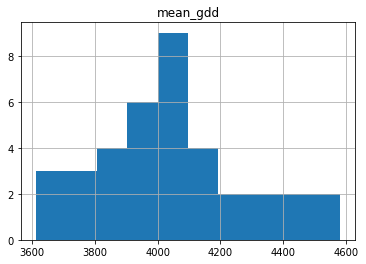

In [11]:
one_loc = all_data_usa[all_data_usa['location'] == all_data_usa['location'][3]]
one_loc.hist(column="mean_gdd");

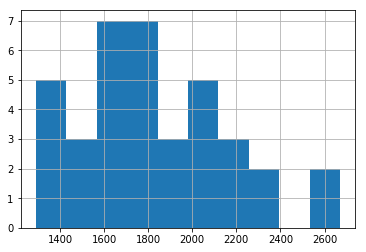

In [13]:
one_loc['mean_precip'].hist();


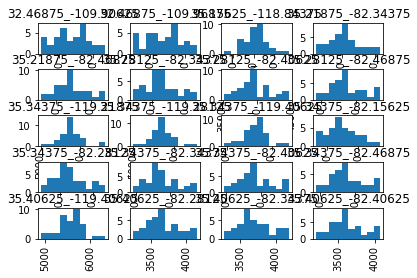

In [14]:
two_locs = all_data_usa[all_data_usa['location'].isin(all_data_usa['location'][0:20])];
two_locs.hist(column="mean_gdd", by='location');

In [ ]:
# all_data_usa.hist(column="mean_gdd", by='location');

In [ ]:
# all_data_usa.hist(column="mean_precip", by='location');

In [15]:
two_locs.location.unique()

array(['32.46875_-109.90625', '32.46875_-109.96875',
       '35.15625_-118.84375', '35.21875_-82.34375', '35.21875_-82.46875',
       '35.28125_-82.34375', '35.28125_-82.40625', '35.28125_-82.46875',
       '35.34375_-119.21875', '35.34375_-119.28125',
       '35.34375_-119.40625', '35.34375_-82.15625', '35.34375_-82.28125',
       '35.34375_-82.34375', '35.34375_-82.40625', '35.34375_-82.46875',
       '35.40625_-119.40625', '35.40625_-82.28125', '35.40625_-82.34375',
       '35.40625_-82.40625'], dtype=object)

In [16]:
numeric_feat = ['medianDoY', 'NumLarvaGens_Aug', 'mean_escaped_Gen1', 'mean_escaped_Gen2',
                'mean_escaped_Gen3', 'mean_escaped_Gen4', 'mean_precip', 'mean_gdd']
two_locs_numeric = two_locs.loc[:, numeric_feat].copy()

In [ ]:
# mahalanobis(two_locs_numeric) # this is something, it has to give pairwise dist. of rows

In [23]:
two_locs_numeric.head()

,medianDoY,NumLarvaGens_Aug,mean_escaped_Gen1,mean_escaped_Gen2,mean_escaped_Gen3,mean_escaped_Gen4,mean_precip,mean_gdd
0,68,2.939262,1.319697,7.080458,1.348167,0.00000,300.525,4821.668922
1,68,2.946050,1.245847,7.104994,1.396980,0.00000,303.925,4831.770062
2,62,3.563884,0.568308,10.111412,7.650414,0.63345,176.500,6068.648203
3,89,2.199465,4.978327,7.436132,0.107327,0.00000,2670.975,3688.668537
4,92,2.091111,6.356177,5.861102,0.007612,0.00000,2631.075,3410.160966


In [25]:
one_loc = all_data_usa[all_data_usa['location'] == all_data_usa['location'][3]]
one_loc_numeric = one_loc.loc[:, numeric_feat].copy()

In [ ]:
cov_mat = one_loc_numeric.cov()
cov_mat_inv = pd.DataFrame(np.linalg.pinv(cov_mat.values), cov_mat.columns, cov_mat.index)
distance.mahalanobis(two_locs_numeric.iloc[0], two_locs_numeric.iloc[1], cov_mat_inv)

In [ ]:
cov_mat_inv.head(2)

In [ ]:
cov_mat.head()

In [ ]:

# robust_cov = MinCovDet().fit(one_loc_numeric)


In [ ]:
.mahalanobis(two_locs_numeric)

In [ ]:
# the following two are the same
# emp_cov = EmpiricalCovariance(assume_centered=False).fit(one_loc_numeric)
cov1 = sklearn.covariance.empirical_covariance(one_loc_numeric, assume_centered=False)

In [ ]:
cov_mat = one_loc_numeric.cov()

In [ ]:
cov_mat